In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import KaplanMeierFitter

In [3]:
data = pd.read_csv("lung.csv")

In [4]:
data.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 228 entries, 0 to 227
Data columns (total 11 columns):
Unnamed: 0    228 non-null int64
inst          227 non-null float64
time          228 non-null int64
status        228 non-null int64
age           228 non-null int64
sex           228 non-null int64
ph.ecog       227 non-null float64
ph.karno      227 non-null float64
pat.karno     225 non-null float64
meal.cal      181 non-null float64
wt.loss       214 non-null float64
dtypes: float64(6), int64(5)
memory usage: 19.7 KB


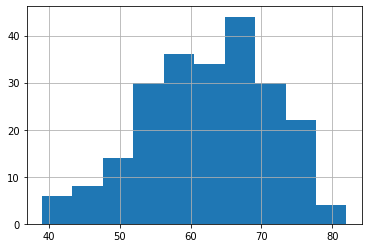

In [6]:
data["age"].hist()

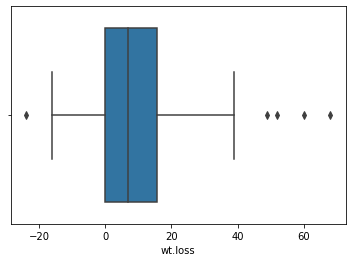

In [54]:
# detecting outliers
sns.boxplot(x=data["wt.loss"])

In [67]:
# Finding the relations between the variables.
plt.figure(figsize=(20,10))
c= data[data.columns[2:-1]].corr()


<Figure size 1440x720 with 0 Axes>

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
time,1.000000,-0.171183,-0.078043,0.129615,-0.200813,0.133082,0.184323,0.074373,0.008946
status,-0.171183,1.000000,0.149702,-0.243433,0.232764,-0.182260,-0.171504,0.023646,0.035023
age,-0.078043,0.149702,1.000000,-0.122167,0.193236,-0.203182,-0.126167,-0.231411,0.038148
sex,0.129615,-0.243433,-0.122167,1.000000,-0.020604,0.011385,0.046071,-0.168360,-0.129077
ph.ecog,-0.200813,0.232764,0.193236,-0.020604,1.000000,-0.807267,-0.511221,-0.098510,0.187589
ph.karno,0.133082,-0.182260,-0.203182,0.011385,-0.807267,1.000000,0.520297,0.042233,-0.175435
pat.karno,0.184323,-0.171504,-0.126167,0.046071,-0.511221,0.520297,1.000000,0.165759,-0.171991
meal.cal,0.074373,0.023646,-0.231411,-0.168360,-0.098510,0.042233,0.165759,1.000000,-0.102572
wt.loss,0.008946,0.035023,0.038148,-0.129077,0.187589,-0.175435,-0.171991,-0.102572,1.000000


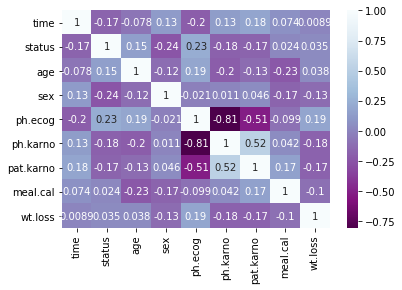

In [68]:
sns.heatmap(c,cmap="BuPu_r",annot=True)
c

In [7]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
df_num.head()

,Unnamed: 0,inst,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss
0,1,3.0,306,2,74,1,1.0,90.0,100.0,1175.0,NaN
1,2,3.0,455,2,68,1,0.0,90.0,90.0,1225.0,15.0
2,3,3.0,1010,1,56,1,0.0,90.0,90.0,NaN,15.0
3,4,5.0,210,2,57,1,1.0,90.0,60.0,1150.0,11.0
4,5,1.0,883,2,60,1,0.0,100.0,90.0,NaN,0.0


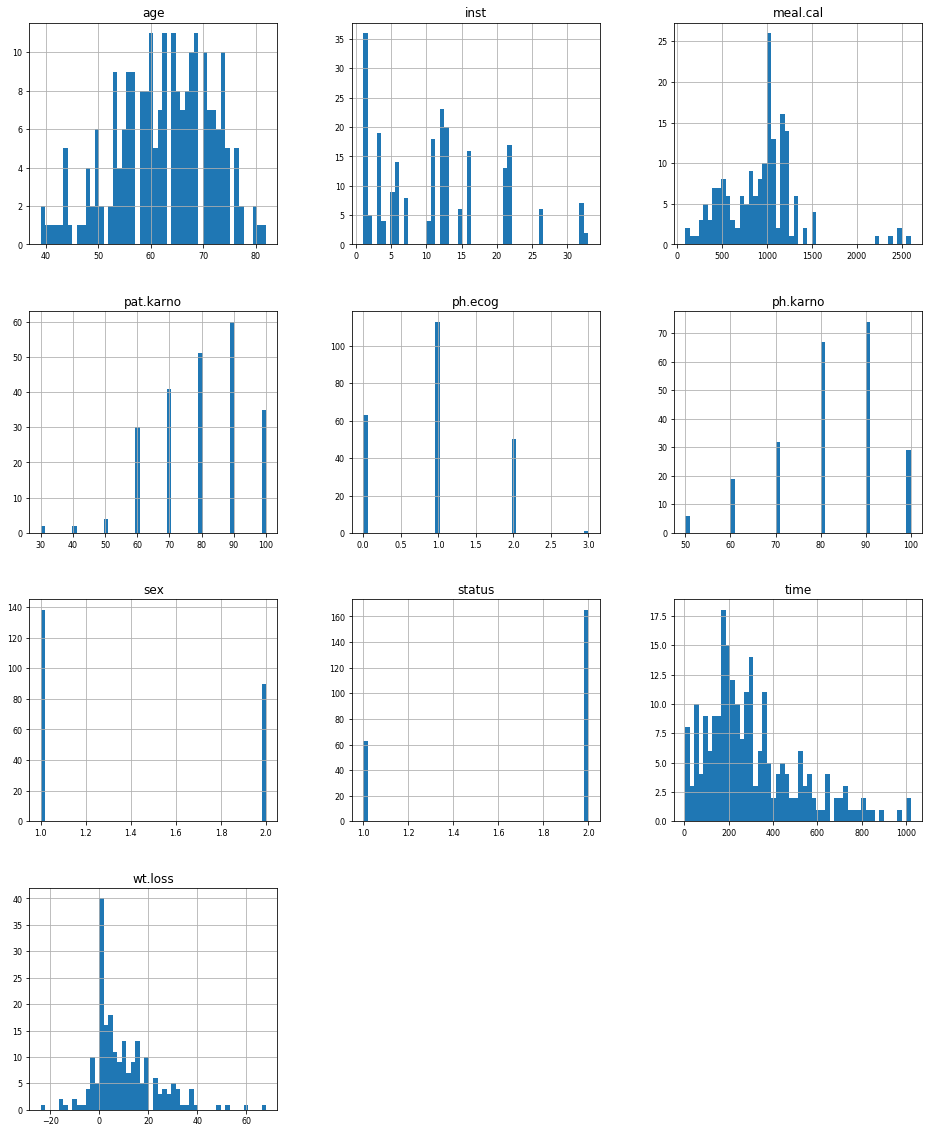

In [8]:
df_num[df_num.columns[1:]].hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8); # ; avoid having the matplotlib verbose informations

count    228.000000
mean      62.447368
std        9.073457
min       39.000000
25%       56.000000
50%       63.000000
75%       69.000000
max       82.000000
Name: age, dtype: float64


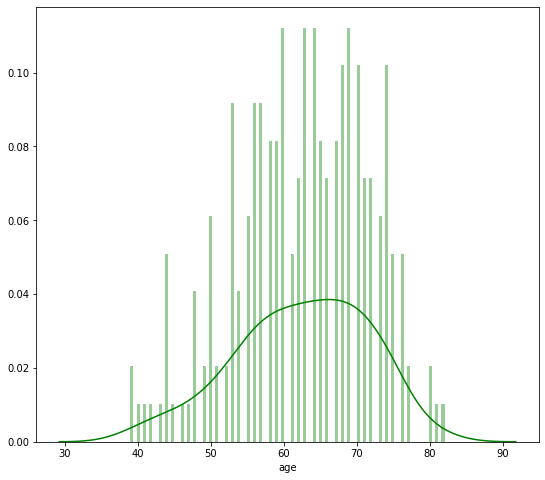

In [10]:
print(data['age'].describe())
plt.figure(figsize=(9, 8))
sns.distplot(data['age'], color='g', bins=100, hist_kws={'alpha': 0.4});

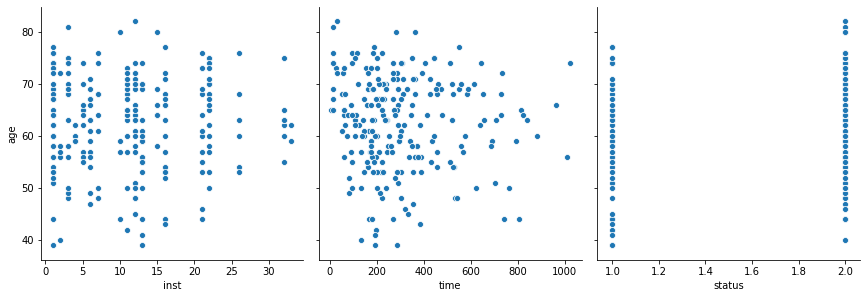

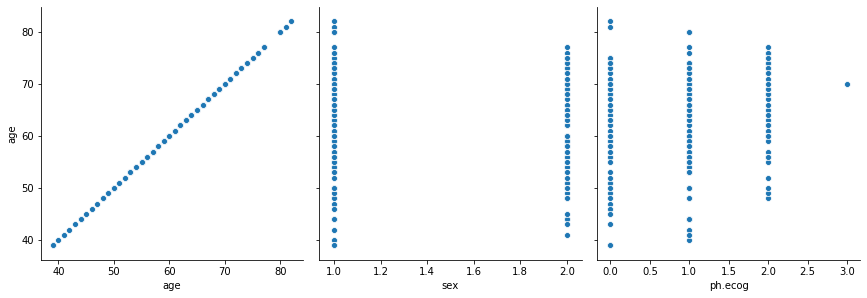

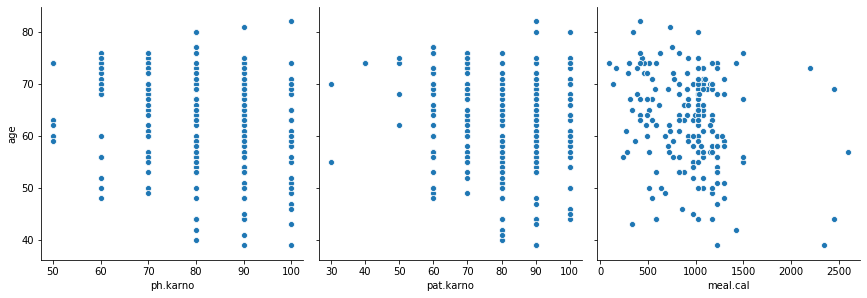

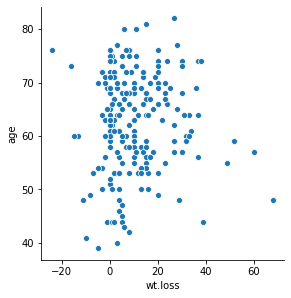

In [16]:
for i in range(1, len(df_num.columns), 3):
    sns.pairplot(data=df_num,
                x_vars=df_num.columns[i:i+3],
                y_vars=['age'],
                height = 4)

In [29]:
kmf = KaplanMeierFitter()

In [30]:
# Organize our data :
# If status = 1 , then dead = 0
# If status = 2 , then dead = 1
data.loc[data.status == 1, 'dead'] = 0
data.loc[data.status == 2, 'dead'] = 1
print (data.head())

   Unnamed: 0  inst  time  status  age  sex  ph.ecog  ph.karno  pat.karno  \
0           1   3.0   306       2   74    1      1.0      90.0      100.0   
1           2   3.0   455       2   68    1      0.0      90.0       90.0   
2           3   3.0  1010       1   56    1      0.0      90.0       90.0   
3           4   5.0   210       2   57    1      1.0      90.0       60.0   
4           5   1.0   883       2   60    1      0.0     100.0       90.0   

   meal.cal  wt.loss  dead  
0    1175.0      NaN   1.0  
1    1225.0     15.0   1.0  
2       NaN     15.0   0.0  
3    1150.0     11.0   1.0  
4       NaN      0.0   1.0  


In [31]:
data[data.columns[2:]].describe()

,time,status,age,sex,ph.ecog,ph.karno,pat.karno,meal.cal,wt.loss,dead
count,228.000000,228.000000,228.000000,228.000000,227.000000,227.000000,225.000000,181.000000,214.000000,228.000000
mean,305.232456,1.723684,62.447368,1.394737,0.951542,81.938326,79.955556,928.779006,9.831776,0.723684
std,210.645543,0.448159,9.073457,0.489870,0.717872,12.327955,14.623177,402.174707,13.139902,0.448159
min,5.000000,1.000000,39.000000,1.000000,0.000000,50.000000,30.000000,96.000000,-24.000000,0.000000
25%,166.750000,1.000000,56.000000,1.000000,0.000000,75.000000,70.000000,635.000000,0.000000,0.000000
50%,255.500000,2.000000,63.000000,1.000000,1.000000,80.000000,80.000000,975.000000,7.000000,1.000000
75%,396.500000,2.000000,69.000000,2.000000,1.000000,90.000000,90.000000,1150.000000,15.750000,1.000000
max,1022.000000,2.000000,82.000000,2.000000,3.000000,100.000000,100.000000,2600.000000,68.000000,1.000000


In [32]:
# Fit the data into model.
# The 1st arg accepts an array or pd.Series of individual survival times
# The 2nd arg accepts an array or pd.Series that indicates if the event 
# interest (or death) occured.
kmf.fit(durations =  data["time"], event_observed = data["dead"])

<lifelines.KaplanMeierFitter:"KM_estimate", fitted with 228 total observations, 63 right-censored observations>

In [33]:
# Print the event table
# Removed = Observed + Censored
# Censored = Person that didn't die.(They are of no use to us!)
# Observed = Persons that died.
print (kmf.event_table)

          removed  observed  censored  entrance  at_risk
event_at                                                
0.0             0         0         0       228      228
5.0             1         1         0         0      228
11.0            3         3         0         0      227
12.0            1         1         0         0      224
13.0            2         2         0         0      223
15.0            1         1         0         0      221
26.0            1         1         0         0      220
30.0            1         1         0         0      219
31.0            1         1         0         0      218
53.0            2         2         0         0      217
54.0            1         1         0         0      215
59.0            1         1         0         0      214
60.0            2         2         0         0      213
61.0            1         1         0         0      211
62.0            1         1         0         0      210
65.0            2         2    

In [34]:
# Calculating survival probability by hand :
event_at_0 = kmf.event_table.iloc[0,:]
# Calculate the survival probability for t=0
surv_for_0 = (event_at_0.at_risk - event_at_0.observed)/event_at_0.at_risk
surv_for_0

1.0

In [35]:
# Calculating survival probability by hand :
event_at_5 = kmf.event_table.iloc[1,:]
# Calculate the survival probability for t=0
surv_for_5 = (event_at_5.at_risk - event_at_5.observed)/event_at_5.at_risk
surv_for_5

0.9956140350877193

In [36]:
# Calculating survival probability by hand :
event_at_11 = kmf.event_table.iloc[2,:]
# Calculate the survival probability for t=0
surv_for_11 = (event_at_11.at_risk - event_at_11.observed)/event_at_11.at_risk
surv_for_11

0.986784140969163

In [37]:
# Calculating actual probabilities :
surv_after_5 = surv_for_0 * surv_for_5
surv_after_11 = surv_for_0 * surv_for_5 * surv_for_11
print (surv_after_5)
print (surv_after_11)

0.9956140350877193
0.9824561403508771


In [38]:
# Our kmf object has done all these calculations for us :
print (kmf.predict(11))

0.9824561403508766


In [39]:
# For an array :
print (kmf.predict([0,5,11,12]))

0     1.000000
5     0.995614
11    0.982456
12    0.978070
Name: KM_estimate, dtype: float64


In [40]:
# To get full list :
print (kmf.survival_function_)

          KM_estimate
timeline             
0.0          1.000000
5.0          0.995614
11.0         0.982456
12.0         0.978070
13.0         0.969298
15.0         0.964912
26.0         0.960526
30.0         0.956140
31.0         0.951754
53.0         0.942982
54.0         0.938596
59.0         0.934211
60.0         0.925439
61.0         0.921053
62.0         0.916667
65.0         0.907895
71.0         0.903509
79.0         0.899123
81.0         0.890351
88.0         0.881579
92.0         0.877193
93.0         0.872785
95.0         0.863969
105.0        0.859561
107.0        0.850700
110.0        0.846269
116.0        0.841838
118.0        0.837407
122.0        0.832977
131.0        0.828546
...               ...
558.0        0.239218
559.0        0.239218
567.0        0.230674
574.0        0.222131
583.0        0.213587
588.0        0.213587
613.0        0.204688
624.0        0.195788
641.0        0.186889
643.0        0.177989
654.0        0.169090
655.0        0.160190
687.0     

In [41]:
# It provides the number of days where on average 50% of patients died.
print (kmf.median_survival_time_)

310.0


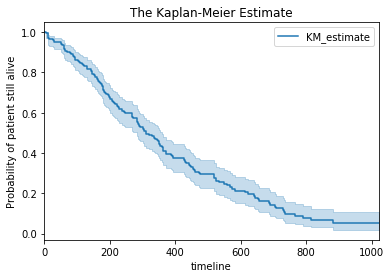

In [42]:
# Plot the graph :
kmf.plot()
plt.title("The Kaplan-Meier Estimate")
plt.ylabel("Probability of patient still alive")
plt.show()

In [43]:
print (kmf.confidence_interval_)

        KM_estimate_lower_0.95  KM_estimate_upper_0.95
0.0                   1.000000                1.000000
5.0                   0.969277                0.999381
11.0                  0.953935                0.993379
12.0                  0.948120                0.990813
13.0                  0.936682                0.985244
15.0                  0.931066                0.982297
26.0                  0.925514                0.979264
30.0                  0.920019                0.976158
31.0                  0.914576                0.972989
53.0                  0.903830                0.966488
54.0                  0.898519                0.963168
59.0                  0.893245                0.959807
60.0                  0.882796                0.952976
61.0                  0.877617                0.949512
62.0                  0.872466                0.946019
65.0                  0.862238                0.938952
71.0                  0.857160                0.935382
79.0      

In [44]:
# Probabaility of die :
# p(1022) = p(0) +......+p(1022)
print (kmf.cumulative_density_)

          KM_estimate
timeline             
0.0          0.000000
5.0          0.004386
11.0         0.017544
12.0         0.021930
13.0         0.030702
15.0         0.035088
26.0         0.039474
30.0         0.043860
31.0         0.048246
53.0         0.057018
54.0         0.061404
59.0         0.065789
60.0         0.074561
61.0         0.078947
62.0         0.083333
65.0         0.092105
71.0         0.096491
79.0         0.100877
81.0         0.109649
88.0         0.118421
92.0         0.122807
93.0         0.127215
95.0         0.136031
105.0        0.140439
107.0        0.149300
110.0        0.153731
116.0        0.158162
118.0        0.162593
122.0        0.167023
131.0        0.171454
...               ...
558.0        0.760782
559.0        0.760782
567.0        0.769326
574.0        0.777869
583.0        0.786413
588.0        0.786413
613.0        0.795312
624.0        0.804212
641.0        0.813111
643.0        0.822011
654.0        0.830910
655.0        0.839810
687.0     

          NA_estimate
timeline             
0.0          0.000000
5.0          0.004386
11.0         0.017660
12.0         0.022125
13.0         0.031114
15.0         0.035638
26.0         0.040184
30.0         0.044750
31.0         0.049337
53.0         0.058575
54.0         0.063226
59.0         0.067899
60.0         0.077311
61.0         0.082050
62.0         0.086812
65.0         0.096405
71.0         0.101236
79.0         0.106090
81.0         0.115870
88.0         0.125747
92.0         0.130722
93.0         0.135747
95.0         0.145873
105.0        0.150976
107.0        0.161312
110.0        0.166520
116.0        0.171755
118.0        0.177019
122.0        0.182310
131.0        0.187629
...               ...
558.0        1.420303
559.0        1.420303
567.0        1.456017
574.0        1.493054
583.0        1.531516
588.0        1.531516
613.0        1.573182
624.0        1.616661
641.0        1.662115
643.0        1.709734
654.0        1.759734
655.0        1.812366
687.0     

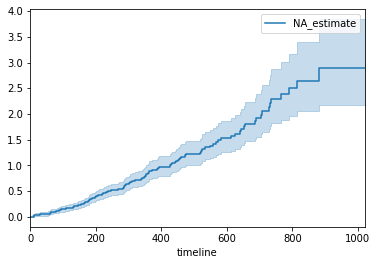

In [45]:
# Hazard FUnction :
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(data["time"],event_observed = data["dead"])
print (naf.cumulative_hazard_)
naf.plot()

          NA_estimate
timeline             
0.0          0.000000
5.0          0.004386
11.0         0.017660
12.0         0.022125
13.0         0.031114
15.0         0.035638
26.0         0.040184
30.0         0.044750
31.0         0.049337
53.0         0.058575
54.0         0.063226
59.0         0.067899
60.0         0.077311
61.0         0.082050
62.0         0.086812
65.0         0.096405
71.0         0.101236
79.0         0.106090
81.0         0.115870
88.0         0.125747
92.0         0.130722
93.0         0.135747
95.0         0.145873
105.0        0.150976
107.0        0.161312
110.0        0.166520
116.0        0.171755
118.0        0.177019
122.0        0.182310
131.0        0.187629
...               ...
558.0        1.420303
559.0        1.420303
567.0        1.456017
574.0        1.493054
583.0        1.531516
588.0        1.531516
613.0        1.573182
624.0        1.616661
641.0        1.662115
643.0        1.709734
654.0        1.759734
655.0        1.812366
687.0     

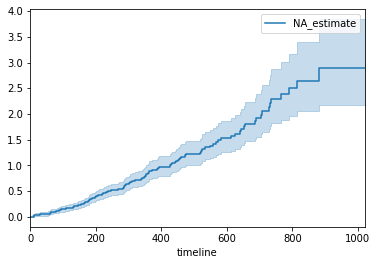

In [46]:
# Hazard FUnction :
from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()
naf.fit(data["time"],event_observed = data["dead"])
print (naf.cumulative_hazard_)
naf.plot()

In [47]:
# We can predict the value of a certain point :
print (naf.predict(1022))

2.8915648373471052
